In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import KFold
from keras.optimizers import RMSprop,Adam,SGD


In [ ]:
# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28

x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

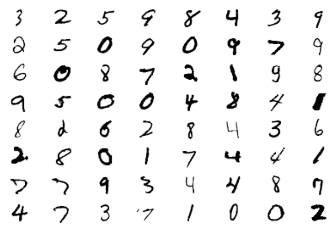

In [ ]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## Change values to be from 0 to 1 instead 0 to 255 to make the training faster

In [ ]:

x_train= x_train.astype('float32')
x_test = x_test.astype('float32')
x_train =x_train/255.0
x_test = x_test/255.0

## Building the CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scores, histories = [], []
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    # fit model
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    # evaluate model
    _, acc = model.evaluate(x_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0172 - accuracy: 0.9957 - val_loss: 0.0432 - val_accuracy: 0.9863
Epoch 2/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0405 - val_accuracy: 0.9866
Epoch 3/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 0.0417 - val_accuracy: 0.9859
Epoch 4/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0114 - accuracy: 0.9973 - val_loss: 0.0403 - val_accuracy: 0.9868
Epoch 5/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 0.0420 - val_accuracy: 0.9873
Epoch 6/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0082 - accuracy: 0.9984 - val_loss: 0.0412 - val_accuracy: 0.9869
Epoch 7/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0073 - accuracy: 0.9988 - val_loss: 0.0413 - val_accuracy: